### import & load & EDA

In [1]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sktime.datasets import (
    load_arrow_head,        # univariate dataset
    load_basic_motions,     # multivariate dataset
    load_japanese_vowels,   # multivariate dataset with unequal length
)
from sktime.transformations.panel.rocket import (
    MiniRocket,
    MiniRocketMultivariate,
    MiniRocketMultivariateVariable,
)

In [2]:
help(load_arrow_head)

Help on function load_arrow_head in module sktime.datasets._single_problem_loaders:

load_arrow_head(split=None, return_X_y=True, return_type=None)
    Load the ArrowHead time series classification problem and returns X and y.
    
    Parameters
    ----------
    split: None or one of "TRAIN", "TEST", optional (default=None)
        Whether to load the train or test instances of the problem.
        By default it loads both train and test instances (in a single container).
    return_X_y: bool, optional (default=True)
        If True, returns (features, target) separately instead of a single
        dataframe with columns for features and the target.
    return_type: valid Panel mtype str or None, optional (default=None="nested_univ")
        Memory data format specification to return X in, None = "nested_univ" type.
        str can be any supported sktime Panel mtype,
            for list of mtypes, see datatypes.MTYPE_REGISTER
            for specifications, see examples/AA_datatyp

In [3]:
(X, y) = load_arrow_head()
print(X.shape, y.shape, type(X), type(y))

(211, 1) (211,) <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [4]:
X.head()

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...


In [5]:
print(X.iloc[0,0], f"type은 {type(X.iloc[0,0])}", sep='\n')
print("따라서 데이터의 shape은 n*T*d = 221*251*1이다.")

0     -1.963009
1     -1.957825
2     -1.956145
3     -1.938289
4     -1.896657
         ...   
246   -1.841345
247   -1.884289
248   -1.905393
249   -1.923905
250   -1.909153
Length: 251, dtype: float64
type은 <class 'pandas.core.series.Series'>
따라서 데이터의 shape은 n*T*d = 221*251*1이다.


In [6]:
print(np.unique(y), y[:3])

['0' '1' '2'] ['0' '1' '2']


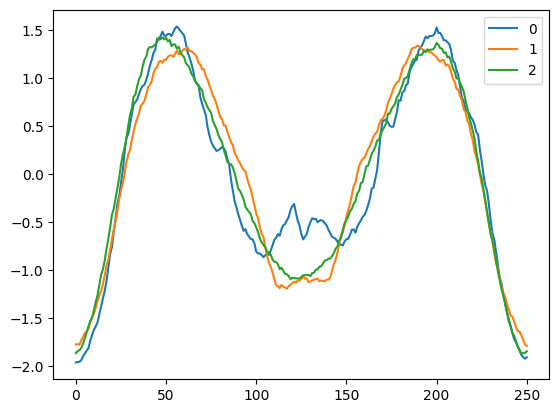

In [7]:
for i in range(3):
    plt.plot(X.iloc[i,0], label=f"{i}")
plt.legend()
plt.show()

### miniROCKET

In [8]:
X_train, y_train = load_arrow_head(split="train", return_X_y=True)

In [9]:
minirocket = MiniRocket()
minirocket.fit(X_train)
X_train_transform = minirocket.transform(X_train)
# test shape of transformed training data -> (n_instances, 9_996)
X_train_transform.shape

(36, 9996)

In [10]:
scaler = StandardScaler(with_mean=False)
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))

X_train_scaled_transform = scaler.fit_transform(X_train_transform)
classifier.fit(X_train_scaled_transform, y_train)

,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,scoring,None
,cv,None
,class_weight,None
,store_cv_results,False


In [11]:
X_test, y_test = load_arrow_head(split="test", return_X_y=True)
X_test_transform = minirocket.transform(X_test)

In [12]:
X_test_scaled_transform = scaler.transform(X_test_transform)
#classifier.score(X_test_scaled_transform, y_test)

In [13]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test_scaled_transform)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.75      0.84        69
           1       0.80      0.92      0.86        53
           2       0.86      0.96      0.91        53

    accuracy                           0.87       175
   macro avg       0.87      0.88      0.87       175
weighted avg       0.88      0.87      0.87       175

